In [1]:
import os

# Verificar directorio actual
print("Directorio actual:", os.getcwd())

# Ver ruta completa al config.yaml que debería existir
config_path = os.path.join(os.getcwd(), '..', 'config', 'config.yaml')
print("Ruta esperada del config:", config_path)

# Ver ruta completa al archivo de datos
data_path = os.path.join(os.getcwd(), '..', 'data', 'raw', 'data2.csv')
print("Ruta esperada de los datos:", data_path)

# Verificar si los archivos existen
print("\n¿Existen los archivos?")
print("config.yaml existe:", os.path.exists(config_path))
print("data2.csv existe:", os.path.exists(data_path))

Directorio actual: d:\Proyectos Personales ML\Fraud detection\notebooks
Ruta esperada del config: d:\Proyectos Personales ML\Fraud detection\notebooks\..\config\config.yaml
Ruta esperada de los datos: d:\Proyectos Personales ML\Fraud detection\notebooks\..\data\raw\data2.csv

¿Existen los archivos?
config.yaml existe: True
data2.csv existe: True


In [2]:
import yaml

# Intentar leer el archivo directamente
config_path = os.path.join(os.getcwd(), '..', 'config', 'config.yaml')
try:
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
        print("Archivo YAML cargado correctamente")
except Exception as e:
    print(f"Error al cargar YAML: {str(e)}")

Archivo YAML cargado correctamente


In [3]:
import os
import sys
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from src.data.data_loader import DataLoader

# Cargar datos
data_loader = DataLoader()
df = data_loader.load_data()

if df is not None:
    print(df.shape)
    print(df.head())

Buscando config en: d:\Proyectos Personales ML\Fraud detection\config\config.yaml
Ruta de datos: d:\Proyectos Personales ML\Fraud detection\data\raw\data2.csv
Datos cargados exitosamente
(10000, 6)
  Profession  Income   Credit_card_number Expiry  Security_code  Fraud
0     DOCTOR   42509     3515418493460774  07/25            251      1
1     DOCTOR   80334      213134223583196  05/32            858      1
2     LAWYER   91552     4869615013764888  03/30            755      1
3     LAWYER   43623      341063356109385  01/29            160      1
4     DOCTOR   22962  4707418777543978402  11/30            102      0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
numeric_cols= ['Income','Security_code']



['Income', 'Security_code']


In [6]:
for col in numeric_cols:
    Q1= df[col].quantile(0.25)
    Q3= df[col].quantile(0.75)
    IQR= Q3 - Q1
    lower= Q1 - 1.5*IQR
    upper= Q1 + 1.5*IQR
    outliers = sum((df[col]<lower) | (df[col]>upper))
    print (f" Outliers en {col}: {outliers}")
     
    

 Outliers en Income: 83
 Outliers en Security_code: 719


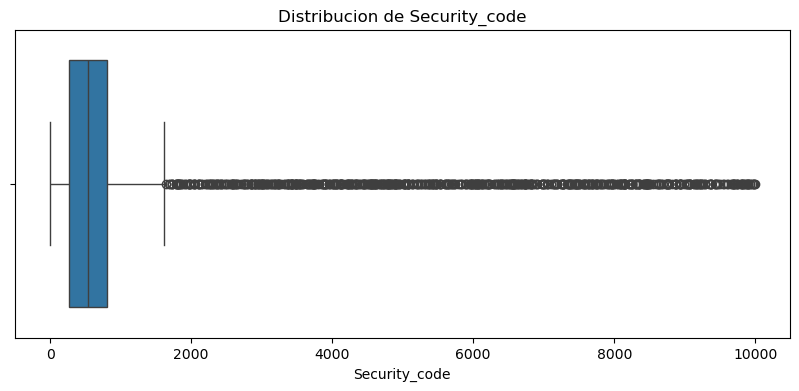

In [7]:
# visualiación
plt.figure(figsize=(10,4))
sns.boxplot(x=df[col])
plt.title(f'Distribucion de {col}')
plt.show()




In [8]:
# Validaciones adicionales
# 1. Verificar rangos válidos
print("Rangos de variables numéricas:")
print(df[['Income', 'Security_code']].describe())

# 2. Verificar consistencia en fechas de vencimiento
df['expiry_year'] = df['Expiry'].str[:2].astype(int)
df['expiry_month'] = df['Expiry'].str[3:].astype(int)

print("\nDistribución de años de vencimiento:")
print(df['expiry_year'].value_counts().sort_index())

print("\nMeses de vencimiento válidos:")
invalid_months = df[~df['expiry_month'].between(1, 12)]
print(f"Meses inválidos encontrados: {len(invalid_months)}")

# 3. Verificar longitud del código de seguridad
df['security_code_length'] = df['Security_code'].astype(str).str.len()
print("\nLongitud de códigos de seguridad:")
print(df['security_code_length'].value_counts())

Rangos de variables numéricas:
            Income  Security_code
count  10000.00000   10000.000000
mean   49761.20600     863.587800
std    28837.72928    1484.424959
min        1.00000       0.000000
25%    24863.75000     275.000000
50%    49483.00000     539.500000
75%    74483.00000     813.250000
max    99986.00000    9990.000000

Distribución de años de vencimiento:
expiry_year
1     882
2     740
3     810
4     818
5     852
6     842
7     910
8     874
9     785
10    798
11    788
12    901
Name: count, dtype: int64

Meses de vencimiento válidos:
Meses inválidos encontrados: 10000

Longitud de códigos de seguridad:
security_code_length
3    8383
2     805
4     723
1      89
Name: count, dtype: int64
